# Mass omega simulations and plots, Adding Ag via neutrino winds

### Initiate the relevant code

Here all modules needed are imported, including a custom python module containing some functions used when dealing with data, this file is called omega_data_manipulation.py. This custom module has docstrings for all functions (found by odm.X? where X is the function, or odm? for a overview)
A function that changes long form numbers into scientific notation and a colour range for plots is included

format_e function taken from https://stackoverflow.com/questions/6913532/display-a-decimal-in-scientific-notation

In [2]:
#NuPyCEE modules
import stellab
reload(stellab)
import omega
st = stellab.stellab()
import sygma
reload(sygma)
reload(omega)
#General Python modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from decimal import Decimal
import math
import time as t_module
#Custom python module used
import omega_data_manipulation as odm
reload(odm)

#Function to create sci notation for plots.
def format_e(n):
    a = '%E' % n
    return a.split('E')[0].rstrip('0').rstrip('.') + 'E' + a.split('E')[1]

#colour range for plotting
colrng=['k','b','r','g','orange','purple','pink','yellow','c','m','0.75','0.5','#11ff11',\
        '#73ff11','maroon','eggplant','#14f21b','#122f15','#16fb1a','#aabb11','#abcdef']
print 'Colour range length: %s' %(len(colrng))

Colour range length: 21


### Simulations

Here the simulations are ran, they are controlled by the lists at the top of each cell. Located within the lists is a list consisting of values gathered from cote et al 2017 (http://arxiv.org/abs/1610.02405)


Below is the code for a set of coalition time runs, including all values inputted. This can take some time if the total inputs or the time steps are large.

The code is created using a exec() command, this can be a problem as it allows the running of custom code within the cell. This may prove to be a security issue.

In [7]:
#Inputs for Coalition time, these are X in the oXYZ output
#coal = [2.5e7,2.75e7,3e7,3.25e7,3.5e7]
#coal = [2e7,4e7,6e7,8e7,1e8,2e8,4e8,6e8,8e8,1e9]
coal = [5e7,6e7,7e7,8e7,9e7,1e8]

#Inputs for Ejected Mass, these are Y in the oXYZ output
#ej_nsm=[1e-2,1.5e-2,2e-2,2.5e-2,3e-2,3.5e-2,4e-2,4.5e-2,5e-2,5.5e-2,6e-2,6.5e-2]
ej_nsm=[6e-2]
#ej_nsm=[1e-2,1.5e-2,2e-2,2.5e-2]

#Inputs for NSM per unit solar mass, these are Z in the oXYZ output
#nsm_ms=[4.34e-5,3.56e-5,5.45e-5,1.12e-5,2.89e-6] #Using data found in Benoit 2017
#nsm_ms=[0.5e-5,1e-5,1.5e-5,2e-5,2.5e-5,3e-5,3.5e-5,4e-5,4.5e-5]#Using ranges found by inspection
nsm_ms=[4e-5]

#Input for mgal (Init Gas Resevoir)
mgal_in=1e11

#Table Input
table='yield_tables/r_process_arnould_2007.txt'

#Steps used in simulation
steps=31
length = len(coal)*len(ej_nsm)*len(nsm_ms)
print 'Runs: %s' %(length+1)
ii=0 #Counter for coal run 
run =1.
timelist=[]
print 'BEGIN OMEGA RUNS - VARYING COALITION TIME, EJECTED MASS AND NEUTRON STAR MERGERS PER SOLAR MASS'

#Warning if time expected to exceed roughly 10 mins
if steps>30:
    if length>200:
        print '###############################################################################################'
        print '###WARNING LARGE AMOUNTS OF INPUTS WITH LARGE TIME STEPS MAY TAKE SIGNIFICANT TIME TO FINISH###'
        print '###############################################################################################'
        
#Control omega run, all default apart from mgal
control = omega.omega(galaxy='milky_way', mgal=mgal_in, ns_merger_on=True, special_timesteps=steps)
print '-----------------------------------------------------------------------------------------------'

#Main set of simulations
for i in range(len(coal)):
    coalii = 'c'+str(i)
    ejmii = 0 #Counter for ejm run
    #print 'Run name:%s Coal: %s' %(coalii, ii)
    for j in range(len(ej_nsm)):
        ejmi = str(coalii)+'e'+str(ejmii)
        nsmii= 0#Counter for NSM_ms run
        #print 'Run name:%s Coal: %s Ej_M:%s' %(ejmi, ii, ejmii)
        for k in range(len(nsm_ms)):
            nsmi = str(ejmi)+'n'+str(nsmii)
            run_perc=(run/length)*100
            print '-----------------------------------------------------------------------------------------------'
            print 'Run name:%s Coal:%s Ej_M:%s NSM:%s. Run length:%s Percent' %(nsmi,ii,ejmii,nsmii,run_perc)
            exec(nsmi + "= omega.omega(galaxy='milky_way',special_timesteps=steps, mgal=mgal_in, ns_merger_on=True, t_nsm_coal=coal[ii], m_ej_nsm=ej_nsm[j], nb_nsm_per_m=nsm_ms[k])")
            exec('timetaken=round((t_module.time() -'+nsmi+'.start_time),2)')
            #print timetaken
            timelist.append(timetaken)
            #print timelist
            ave_time_step=np.sum(timelist)/run
            #print ave_time_step
            est_time_rem=round(ave_time_step*(length-run),1)
            est_time_rem_min=round(est_time_rem/60,2)
            print 'Steps remaining:%s, Est. Time remaining: %ss (%s min)' %((length-run), est_time_rem, est_time_rem_min)
            print '-----------------------------------------------------------------------------------------------'
            nsmii = nsmii+1
            run=run+1
        ejmii = ejmii+1
    ii=ii+1   
print '-----------------------------------------------------------------------------------------------'
print '-----------------------------------------------------------------------------------------------'
print 'DONE'
print 'Time taken = %ss [%s mins]' %(np.sum(timelist),(np.sum(timelist)/60))
print '-----------------------------------------------------------------------------------------------'
print '-----------------------------------------------------------------------------------------------'
print 'Coalition Time list: %s' %(coal)
print 'Ejected Mass list: %s' %(ej_nsm)
print 'NSM per unit solar mass list: %s' %(nsm_ms)
print '-----------------------------------------------------------------------------------------------'
print '-----------------------------------------------------------------------------------------------'

Runs: 7
BEGIN OMEGA RUNS - VARYING COALITION TIME, EJECTED MASS AND NEUTRON STAR MERGERS PER SOLAR MASS
OMEGA run in progress..
   OMEGA run completed - Run time: 4.32s
-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------
Run name:c0e0n0 Coal:0 Ej_M:0 NSM:0. Run length:16.6666666667 Percent
OMEGA run in progress..
   OMEGA run completed - Run time: 4.4s
Steps remaining:5.0, Est. Time remaining: 22.0s (0.37 min)
-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------
Run name:c1e0n0 Coal:1 Ej_M:0 NSM:0. Run length:33.3333333333 Percent
OMEGA run in progress..
   OMEGA run completed - Run time: 3.89s
Steps remaining:4.0, Est. Time remaining: 16.6s (0.28 min)
------------------------------------------------------------

### Simulation plotting

Plotting the simulations ran above.

The plotted values can be changed via the coall, ejl and nsml.

<IPython.core.display.Javascript object>


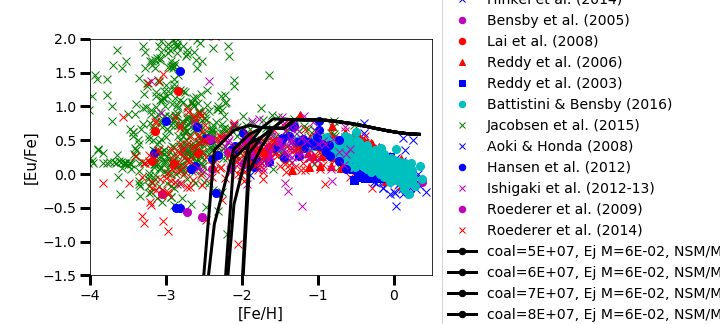

['c0e0n0', 'c1e0n0', 'c2e0n0', 'c3e0n0', 'c4e0n0', 'c5e0n0']


((-4, 0.5), (-1.5, 2))

In [35]:
reload(odm)
#Define the elements plotted
y='[Eu/Fe]'
x='[Fe/H]'
%matplotlib nbagg
crange=[]
dir_obs="C:/Users/Thomas/NuPyCEE-master/stellab_data/milky_way_data/"#Use os.path
obslist=dir_obs+'Roederer_et_al_2009_stellab.txt',dir_obs+'Roederer_et_al_2014_pecu_excluded_stellab.txt',dir_obs+'Hansen_et_al_2012_pecu_excluded_stellab.txt',dir_obs+'Battistini_Bensby_2016_stellab.txt'
st.plot_spectro(fig=1, yaxis=y, xaxis=x, show_err=False)#, obs=obslist,norm='stellab_data/solar_normalization/Asplund_et_al_2009.txt')

#Names of simulations being plotted:
#control.plot_spectro(fig=1, yaxis=y, xaxis=x, label='DEFAULT NSM', color='Wheat')
coall=[0,1,2,3,4,5]  #Coal run val
ejl=[0]    #Ejected mass run val
nsml=[0]  #
crange=odm.omega_range_var_nsm(coall,ejl,nsml)
#plt.figure(figsize=(10,10))
#print crange
for i in range(len(crange)):
    exec(crange[i]+".plot_spectro(fig=1, yaxis=y, xaxis=x,label='coal='+format_e(Decimal("+crange[i]+".t_nsm_coal))+', Ej M='+format_e(Decimal("+crange[i]+".m_ej_nsm))+', NSM/Ms='+format_e(Decimal("+crange[i]+".nb_nsm_per_m))+',color="+colrng[i]+"')")
#c0e0n0.plot_spectro(fig=1, yaxis=y, xaxis=x,label='Ej M='+format_e(Decimal(c0e0n0.m_ej_nsm))+', NSM/Ms='+format_e(Decimal(c0e0n0.nb_nsm_per_m))+', coal='+format_e(Decimal(c0e0n0.t_nsm_coal)), color=colrng[i])
plt.show()
plt.xlim(-4,0.5),plt.ylim(-1.5,2)
#plt.title('Ej M='+format_e(Decimal(crange[i].m_ej_nsm))+', coal='+format_e(Decimal(crange[i].t_nsm_coal)))

### Parameter plotting

In order to better understand the simulations parameter plots are used to locate valid nsm, coal and esm values.

In [6]:
#Define a range of parameters, these are what has been used in the simulation
ej_nsm=[0.5e-2,1e-2,1.5e-2,2e-2,2.5e-2,3e-2,3.5e-2,4e-2,4.5e-2]
#nsm_ms=[4.34e-5,3.56e-5,5.45e-5,1.12e-5,2.89e-6] #Using data found in Benoit 2017
nsm_ms=[1e-5,1.5e-5,2e-5,2.5e-5,3e-5,3.5e-5,4e-5,4.5e-5,5e-5,5.5e-5,6e-5,6.5e-5]#Using ranges found by inspection

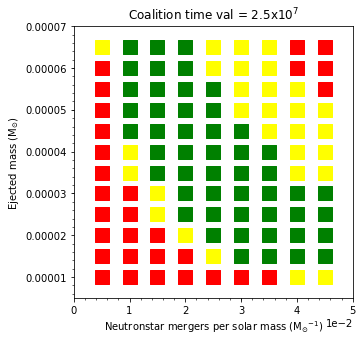

In [15]:
reload(odm)
#Plotting the parameter plot, this requires the manual entering of valid data and tentative data.
#To do: Find auto input for these. Text array input??????????
%matplotlib inline
coal0_ej_plot=ej_nsm
coal0_nsm=nsm_ms
coal0_nsm_ten=[[6.5e-5],[4e-5,3.5e-5],[2.5e-5,3e-5],[2e-5],[1.5e-5,6e-5,6.5e-5],[5e-5,5.5e-5,6e-5,6.5e-5],[4.5e-5,5e-5,5.5e-5,6e-5,6.5e-5],[1e-5,3.5e-5,4e-5,4.5e-5,5e-5,5.5e-5],[1e-5,3.5e-5,3.5e-5,4e-5,4.5e-5,5e-5]]
coal0_nsm_def=[[0],[4.5e-5,5e-5,5.5e-5,6e-5,6.5e-5],[3.5e-5,4e-5,4.5e-5,5e-5,5.5e-5,6e-5,6.5e-5],[2.5e-5,3e-5,3.5e-5,4e-5,4.5e-5,5e-5,5.5e-5,6e-5,6.5e-5],[2e-5,2.5e-5,3e-5,3.5e-5,4e-5,4.5e-5,5e-5,5.5e-5],[1.5e-5,2e-5,2.5e-5,3e-5,3.5e-5,4e-5,4.5e-5,5e-5],[1.5e-5,2e-5,2.5e-5,3e-5,3.5e-5,4e-5],[1.5e-5,2e-5,2.5e-5,3e-5],[1.5e-5,2e-5,2.5e-5,3e-5,3.5e-5,4e-5,4.5e-5,5e-5]]
size=200
#%matplotlib nbagg
odm.para_plot(size,coal0_ej_plot,coal0_nsm,coal0_nsm_def,coal0_nsm_ten,nsm_ms,'Coalition time val = 2.5x10$^7$')

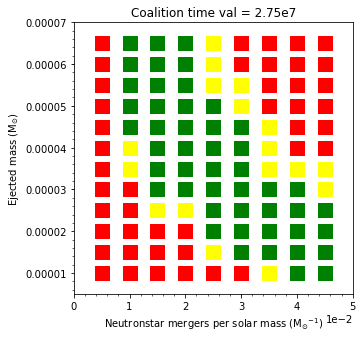

In [16]:
coal1_ej_plot=ej_nsm
coal1_nsm=nsm_ms
coal1_nsm_ten=[[0],[3.5e-5,4e-5],[2.5e-5],[2.5e-5],[1.5e-5,5.5e-5,6e-5,6.5e-5],[5e-5,5.5e-5],[1e-5,3.5e-5,4e-5,4.5e-5],[3.5e-5],[3e-5,3.5e-5]]
coal1_nsm_def=[[0],[4.5e-5,5e-5,5.5e-5,6e-5,6.5e-5],[3e-5,3.5e-5,4e-5,4.5e-5,5e-5,5.5e-5,6e-5,6.5e-5],[2.5e-5,3e-5,3.5e-5,4e-5,4.5e-5,5e-5,5.5e-5,6e-5,6.5e-5],[2e-5,2.5e-5,3e-5,3.5e-5,4e-5,4.5e-5,5e-5],[1.5e-5,2e-5,2.5e-5,3e-5,3.5e-5,4e-5,4.5e-5],[1.5e-5,2e-5,2.5e-5,3e-5],[1e-5,1.5e-5,2e-5,2.5e-5,3e-5],[1e-5,1.5e-5,2e-5,2.5e-5]]
size=200
%matplotlib inline
odm.para_plot(size,coal1_ej_plot,coal1_nsm,coal1_nsm_def,coal1_nsm_ten,nsm_ms,'Coalition time val = 2.75e7')

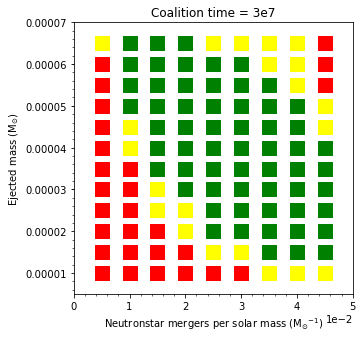

In [17]:
%matplotlib nbagg
coal2_ej_plot=ej_nsm
coal2_nsm=nsm_ms
coal2_nsm_ten=[[6.5e-5],[4e-5,4.5e-5],[2.5e-5,3e-5],[2e-5,2.5e-5],[1.5e-5,6.5e-5],[1.5e-5,6.5e-5],[1e-5,6e-5,6.5e-5],[1e-5,5.5e-5,6e-5,6.5e-5],[1e-5,4.5e-5,5e-5]]
coal2_nsm_def=[[0],[5e-5,5.5e-5,6e-5,6.5e-5],[3e-5,3.5e-5,4e-5,4.5e-5,5e-5,5.5e-5,6e-5,6.5e-5],[3e-5,3.5e-5,4e-5,4.5e-5,5e-5,5.5e-5,6e-5,6.5e-5],[2e-5,2.5e-5,3e-5,3.5e-5,4e-5,4.5e-5,5e-5,5.5e-5,6e-5],[2e-5,2.5e-5,3e-5,3.5e-5,4e-5,4.5e-5,5e-5,5.5e-5,6e-5],[1.5e-5,2e-5,2.5e-5,3e-5,3.5e-5,4e-5,4.5e-5,5e-5,5.5e-5],[1.5e-5,2e-5,2.5e-5,3e-5,3.5e-5,4e-5,4.5e-5,5e-5],[1.5e-5,2e-5,2.5e-5,3e-5,3.5e-5,4e-5]]
size=200
%matplotlib inline
odm.para_plot(size,coal2_ej_plot,coal2_nsm,coal2_nsm_def,coal2_nsm_ten,nsm_ms,'Coalition time = 3e7')

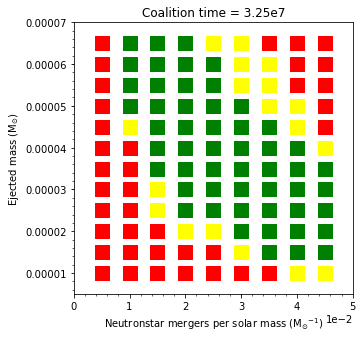

In [18]:
coal3_ej_plot=ej_nsm
coal3_nsm=nsm_ms
coal3_nsm_ten=[[0],[4.5e-5],[2.5e-5,3e-5],[2e-5],[2e-5,6.5e-5],[1.5e-5,5.5e-5,6e-5,6.5e-5],[5e-5,5.5e-5,6e-5],[1e-5,4.5e-5,5e-5],[1e-5,4e-5]]
coal3_nsm_def=[[0],[5e-5,5.5e-5,6e-5,6.5e-5],[3.5e-5,4e-5,4.5e-5,5e-5,5.5e-5,6e-5,6.5e-5],[2.5e-5,3e-5,3.5e-5,4e-5,4.5e-5,5e-5,5.5e-5,6e-5,6.5e-5],[2.5e-5,3e-5,3.5e-5,4e-5,4.5e-5,5e-5,5.5e-5,6e-5],[2e-5,2.5e-5,3e-5,3.5e-5,4e-5,4.5e-5,5e-5],[1.5e-5,2e-5,2.5e-5,3e-5,3.5e-5,4e-5,4.5e-5],[1.5e-5,2e-5,2.5e-5,3e-5,3.5e-5,4e-5],[1.5e-5,2e-5,2.5e-5,3e-5,3.5e-5]]
size=200
%matplotlib inline
odm.para_plot(size,coal3_ej_plot,coal3_nsm,coal3_nsm_def,coal3_nsm_ten,nsm_ms,'Coalition time = 3.25e7')

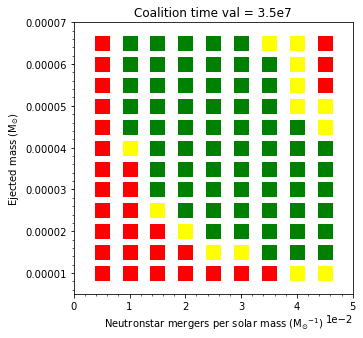

In [19]:
coal4_ej_plot=ej_nsm
coal4_nsm=nsm_ms
coal4_nsm_ten=[[0],[4e-5],[2.5e-5],[2e-5],[1.5e-5],[1.5e-5],[6.5e-5],[1e-5,5e-5,5.5e-5,6e-5,6.5e-5],[1e-5,4.5e-5,5e-5]]
coal4_nsm_def=[[0],[4.5e-5,5e-5,5.5e-5,6e-5,6.5e-5],[3e-5,3.5e-5,4e-5,4.5e-5,5e-5,5.5e-5,6e-5,6.5e-5],[2.5e-5,3e-5,3.5e-5,4e-5,4.5e-5,5e-5,5.5e-5,6e-5,6.5e-5],[2e-5,2.5e-5,3e-5,3.5e-5,4e-5,4.5e-5,5e-5,5.5e-5,6e-5,6.5e-5],[2e-5,2.5e-5,3e-5,3.5e-5,4e-5,4.5e-5,5e-5,5.5e-5,6e-5,6.5e-5],[1.5e-5,2e-5,2.5e-5,3e-5,3.5e-5,4e-5,4.5e-5,5e-5,5.5e-5,6e-5],[1.5e-5,2e-5,2.5e-5,3e-5,3.5e-5,4e-5,4.5e-5],[1.5e-5,2e-5,2.5e-5,3e-5,3.5e-5,4e-5]]
size=200
%matplotlib inline
odm.para_plot(size,coal4_ej_plot,coal4_nsm,coal4_nsm_def,coal4_nsm_ten,nsm_ms,'Coalition time val = 3.5e7')

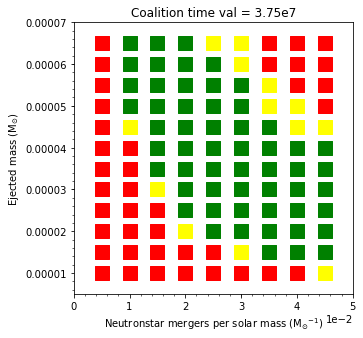

In [20]:
coal5_ej_plot=ej_nsm
coal5_nsm=nsm_ms
coal5_nsm_ten=[[0],[4.5e-5],[3e-5],[2e-5],[6.5e-5],[1.5e-5,6e-5,6.5e-5],[5e-5,5.5e-5],[4.5e-5,5e-5],[1e-5,4.5e-5]]
coal5_nsm_def=[[0],[5e-5,5.5e-5,6e-5,6.5e-5],[3.5e-5,4e-5,4.5e-5,5e-5,5.5e-5,6e-5,6.5e-5],[2.5e-5,3e-5,3.5e-5,4e-5,4.5e-5,5e-5,5.5e-5,6e-5,6.5e-5],[2e-5,2.5e-5,3e-5,3.5e-5,4e-5,4.5e-5,5e-5,5.5e-5,6e-5],[2e-5,2.5e-5,3e-5,3.5e-5,4e-5,4.5e-5,5e-5,5.5e-5],[1.5e-5,2e-5,2.5e-5,3e-5,3.5e-5,4e-5,4.5e-5],[1.5e-5,2e-5,2.5e-5,3e-5,3.5e-5,4e-5],[1.5e-5,2e-5,2.5e-5,3e-5,3.5e-5,4e-5]]
size=200
%matplotlib inline
odm.para_plot(size,coal5_ej_plot,coal5_nsm,coal5_nsm_def,coal5_nsm_ten,nsm_ms,'Coalition time val = 3.75e7')

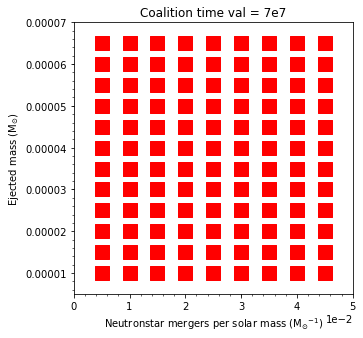

In [23]:
coal6_ej_plot=ej_nsm
coal6_nsm=nsm_ms
coal6_nsm_ten=[[0],[0],[0],[0],[0],[0],[0],[0],[0]]
coal6_nsm_def=[[0],[0],[0],[0],[0],[0],[0],[0],[0]]
size=200
%matplotlib inline
odm.para_plot(size,coal6_ej_plot,coal6_nsm,coal6_nsm_def,coal6_nsm_ten,nsm_ms,'Coalition time val = 7e7')

### Mass adding of files into readable yield tables
These datasets are generated from the NuPyCEE ndw tables already found within the yield tables area.
This data is created according to the following table:

| Neutrino Wind Yield Table | Ye (p:n) | Entropy (JK^-1) |
|---------------------------|----------|-----------------|
| 001                       | 0.45     | 150             |
| 002                       | 0.45     | 400             |
| 003                       | 0.40     | 150             |
| 004                       | 0.35     | 150             |
| 005                       | 0.30     | 150             |
    

In [67]:
reload(odm)
#Define variable for input
timestep=200
m_gal_in=1e11
coal_time=3e7
metalicity=0.02
mlow=15.
mhigh=40.
t=[7.580E+06, 7.581E+06, 9.588E+06, 9.589E+06]
R=[0.,1.,1.,0.]
#Files to be altered
inputfiles=['yield_tables/ndw_wind_expand.001.txt','yield_tables/ndw_wind_expand.002.txt',\
            'yield_tables/ndw_wind_expand.003.txt','yield_tables/ndw_wind_expand.004.txt',\
            'yield_tables/ndw_wind_expand.005.txt',\
            'yield_tables/ndw_wind_expand.001.txt','yield_tables/ndw_wind_expand.003.txt',\
            'yield_tables/ndw_wind_expand.001.txt','yield_tables/ndw_wind_expand.002.txt',\
            'yield_tables/ndw_wind_expand.003.txt','yield_tables/ndw_wind_expand.004.txt',\
            'yield_tables/ndw_wind_expand.005.txt',\
            'yield_tables/ndw_wind_expand.001.txt','yield_tables/ndw_wind_expand.002.txt',\
            'yield_tables/ndw_wind_expand.003.txt','yield_tables/ndw_wind_expand.004.txt',\
            'yield_tables/ndw_wind_expand.005.txt']
#Outgoing files, ready for plotting
outputfiles=['yield_tables/ndw_wind_expand.001Ag.txt','yield_tables/ndw_wind_expand.002Ag.txt',\
            'yield_tables/ndw_wind_expand.003Ag.txt','yield_tables/ndw_wind_expand.004Ag.txt',\
            'yield_tables/ndw_wind_expand.005Ag.txt',\
            'yield_tables/ndw_wind_expand.001Ag.half.txt','yield_tables/ndw_wind_expand.003Ag.half.txt',\
            'yield_tables/ndw_wind_expand.001Ag.tenth.txt','yield_tables/ndw_wind_expand.002Ag.tenth.txt',\
            'yield_tables/ndw_wind_expand.003Ag.tenth.txt','yield_tables/ndw_wind_expand.004Ag.tenth.txt',\
            'yield_tables/ndw_wind_expand.005Ag.tenth.txt',\
            'yield_tables/ndw_wind_expand.001Ag.ten.txt','yield_tables/ndw_wind_expand.002Ag.ten.txt',\
            'yield_tables/ndw_wind_expand.003Ag.ten.txt','yield_tables/ndw_wind_expand.004Ag.ten.txt',\
            'yield_tables/ndw_wind_expand.005Ag.ten.txt']
#The changes in the ejected mass for each table
ej_m_mod= [4e-5,4e-5,4e-5,4e-5,4e-5,2e-5,2e-5,\
           4e-6,4e-6,4e-6,4e-6,4e-6,\
           4e-4,4e-4,4e-4,4e-4,4e-4]
nsm_m=3e-2
ej_m=4.5e-5
names = ['nw001','nw002','nw003','nw004','nw005','nw001_half','nw003_half',\
         'nw001_tenth','nw002_tenth','nw003_tenth','nw004_tenth','nw005_tenth',\
         'nw001_tenfold','nw002_tenfold','nw003_tenfold','nw004_tenfold','nw005_tenfold',]

for i in range(len(inputfiles)):
    odm.editfileAg(inputfiles[i],outputfiles[i],ej_m_mod[i],metalicity)

if len(outputfiles)==len(ej_m_mod)==len(names):
    print 'Data generated, OMEGA Runs begining, Runs:%s' %(len(names))
else:
    print 'Error in list length'    
    
control = omega.omega(galaxy='milky_way', mgal=m_gal_in, ns_merger_on=True, special_timesteps=timestep,\
                      t_nsm_coal=3e7,m_ej_nsm=2e-2,nb_nsm_per_m=4e-5)
for i in range(len(outputfiles)):
    _dtd,_dtdnorm,_yield,_yieldnorm=odm.addfile(metalicity,m_gal_in,mlow,mhigh,t,R,outputfiles[i])
    print 'Run %s/%s, Name:%s' %((i+1),len(names),names[i])
    exec(names[i]+'=odm.omega_add_data(_dtd,_dtdnorm,_yield,_yieldnorm,m_gal_in,coal_time,nsm_m,ej_m_mod[i],timestep)')

print '##################DONE##################DONE##################DONE##################'

File created with nameyield_tables/ndw_wind_expand.001Ag.txt
File created with nameyield_tables/ndw_wind_expand.002Ag.txt
File created with nameyield_tables/ndw_wind_expand.003Ag.txt
File created with nameyield_tables/ndw_wind_expand.004Ag.txt
File created with nameyield_tables/ndw_wind_expand.005Ag.txt
File created with nameyield_tables/ndw_wind_expand.001Ag.half.txt
File created with nameyield_tables/ndw_wind_expand.003Ag.half.txt
File created with nameyield_tables/ndw_wind_expand.001Ag.tenth.txt
File created with nameyield_tables/ndw_wind_expand.002Ag.tenth.txt
File created with nameyield_tables/ndw_wind_expand.003Ag.tenth.txt
File created with nameyield_tables/ndw_wind_expand.004Ag.tenth.txt
File created with nameyield_tables/ndw_wind_expand.005Ag.tenth.txt
File created with nameyield_tables/ndw_wind_expand.001Ag.ten.txt
File created with nameyield_tables/ndw_wind_expand.002Ag.ten.txt
File created with nameyield_tables/ndw_wind_expand.003Ag.ten.txt
File created with nameyield_table

### Plotting of new yield tables

This section uses the same principle as in previous plotting cells, with the changed silver yield tables

<IPython.core.display.Javascript object>


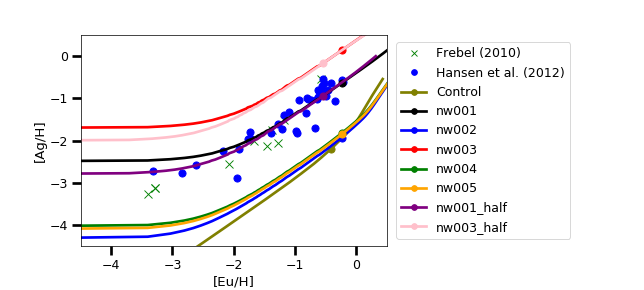

((-4.5, 0.5), (-4.5, 0.5))

In [86]:
%matplotlib nbagg
#Choose elemental plot:
y='[Ag/H]'
x='[Eu/H]'
#PLot the new data:
st.plot_spectro(fig=10, yaxis=y, xaxis=x, show_err=False)
control.plot_spectro(fig=10, yaxis=y, xaxis=x, color='olive',label='Control')
for i in range(0,7):
    exec(names[i]+'.plot_spectro(fig=10, yaxis=y, xaxis=x, color=colrng[i],label="'+names[i]+'")')

plt.xlim(-4.5,0.5),plt.ylim(-4.5,0.5)

nw001_tenfold


<IPython.core.display.Javascript object>


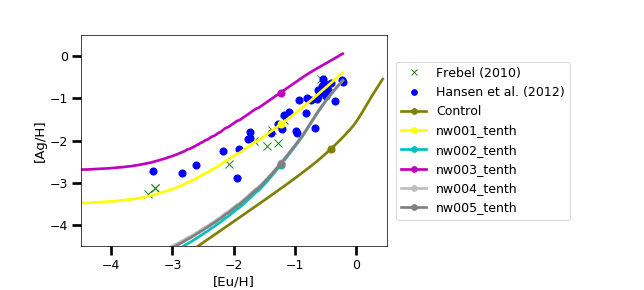

((-4.5, 0.5), (-4.5, 0.5))

In [87]:
%matplotlib nbagg
y='[Ag/H]'
x='[Eu/H]'
#print names[12]
st.plot_spectro(fig=10, yaxis=y, xaxis=x, show_err=False)
control.plot_spectro(fig=10, yaxis=y, xaxis=x, color='olive',label='Control')
for i in range(7,12):
    exec(names[i]+'.plot_spectro(fig=10, yaxis=y, xaxis=x, color=colrng[i],label="'+names[i]+'")')

plt.xlim(-4.5,0.5),plt.ylim(-4.5,0.5)

nw004_tenfold


<IPython.core.display.Javascript object>


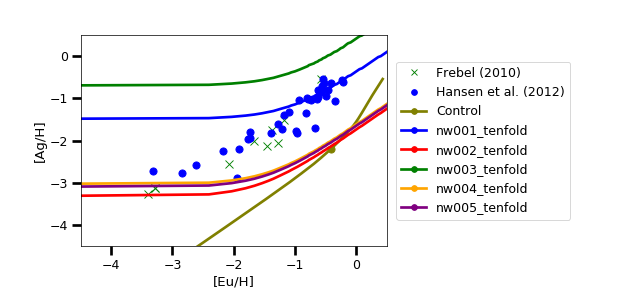

((-4.5, 0.5), (-4.5, 0.5))

In [88]:
%matplotlib nbagg
y='[Ag/H]'
x='[Eu/H]'
print names[15]
st.plot_spectro(fig=10, yaxis=y, xaxis=x, show_err=False)
control.plot_spectro(fig=10, yaxis=y, xaxis=x, color='olive',label='Control')
# for i in range(12,15):
#     exec(names[i]+'.plot_spectro(fig=10, yaxis=y, xaxis=x, color=colrng[i],label="'+names[i]+'")')
#Normal plot method not working.... Time for manual entering
nw001_tenfold.plot_spectro(fig=10, yaxis=y, xaxis=x, color=colrng[1],label=names[12])
nw002_tenfold.plot_spectro(fig=10, yaxis=y, xaxis=x, color=colrng[2],label=names[13])
nw003_tenfold.plot_spectro(fig=10, yaxis=y, xaxis=x, color=colrng[3],label=names[14])
nw004_tenfold.plot_spectro(fig=10, yaxis=y, xaxis=x, color=colrng[4],label=names[15])
nw005_tenfold.plot_spectro(fig=10, yaxis=y, xaxis=x, color=colrng[5],label=names[16])
plt.xlim(-4.5,0.5),plt.ylim(-4.5,0.5)

## End of code
Project end date: 05/2017

Written by Thomas Lawson

In [19]:
reload(odm)
odm.addfile?